# Textkiller 2023 US TV Uplift Analysis

### Import libraries

In [ ]:
from causalimpact import CausalImpact

In [117]:
import numpy as np
import pandas as pd
import datetime

In [157]:
from statsmodels.tsa.arima_process import ArmaProcess

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [292]:
data = pd.read_csv("KOEPPEL FUNNEL.csv", parse_dates=['Date'])

In [293]:
data['CPT']=data.CPT.str[1:]

In [294]:
data['CPT'] = data['CPT'].astype(str).astype(float)

In [295]:
data = data.dropna(how='any', subset=['CPT'])
data = data.dropna(how='any', subset=['Date'])

In [296]:
data=data.sort_values(by=['Date'])

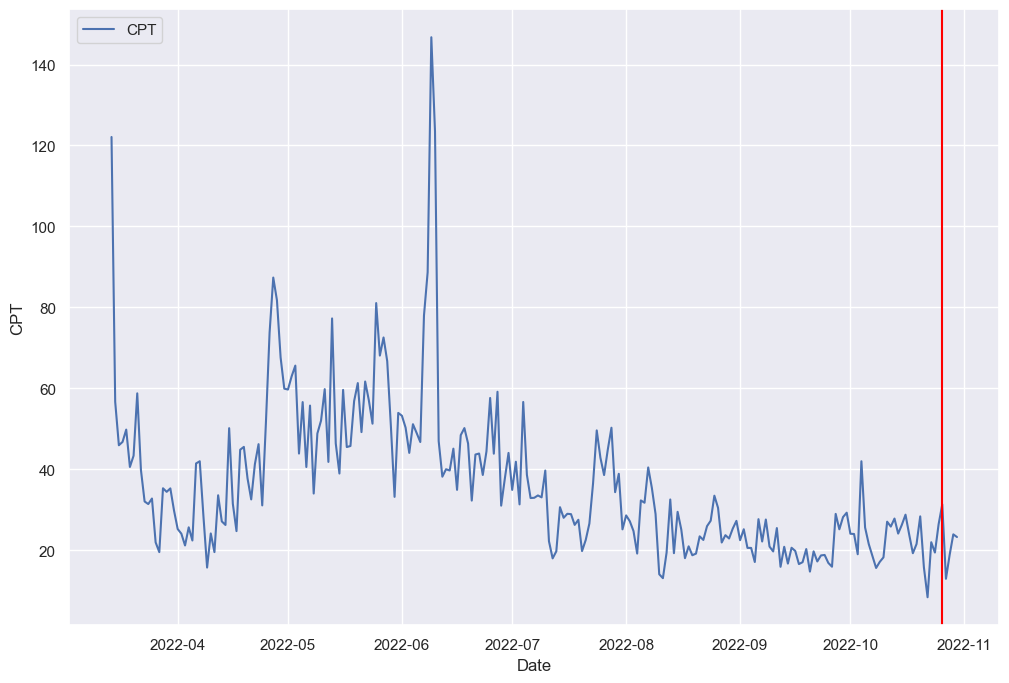

In [297]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data.Date, y=data['CPT'])
plt.axvline(x= data.Date.loc[data['Date'] == '2022-10-26'], color='red')
plt.legend(labels = ['CPT'])

Pre and post intervention periods.

In [298]:
# Print out the time series start date
print(f'The time-series start date is :{data.Date.min()}')
# Print out the time series end date
print(f'The time-series end date is :{data.Date.max()}')

The time-series start date is :2022-03-14 00:00:00
The time-series end date is :2022-10-30 00:00:00


In [299]:
pre_period  = [ pd.Timestamp('2022-03-14') , pd.Timestamp('2022-10-25') ]
post_period = [ pd.Timestamp('2022-10-26') , pd.Timestamp('2022-10-30') ]

In [300]:
# Set pre-period
pre_period = [str(data.Date.min())[:10], str('2022-10-25')]
# Set post-period
post_period = [str('2022-10-26'), str(data.Date.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2022-03-14', '2022-10-25']
The post-period is ['2022-10-26', '2022-10-30']


### Row differences

In [301]:
# Calculate the pre-daily average
pre_daily_avg = data['CPT'][data.Date <= '2022-10-25'].mean()
# Calculate the post-daily average
post_daily_avg = data['CPT'][data.Date > '2022-10-25'].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')

The pre-treatment daily average is 36.6728761061947.
The post-treatment daily average is 22.118000000000002.
The raw difference between the pre and the post treatment is -14.554876106194698.


The pre-treatment daily average is 36.67, the post-treatment daily average is 22.11, 
and the raw difference between the pre and the post treatment is -14.55.

## Causal Impact Analysis on Time Series

In [302]:
data=data[['Date', 'CPT']]

In [303]:
data.set_index('Date', inplace=True)

In [304]:
data

,CPT
Date,
2022-03-14,122.10
2022-03-15,56.70
2022-03-16,45.98
2022-03-17,46.81
2022-03-18,49.85
...,...
2022-10-26,31.40
2022-10-27,13.01
2022-10-28,18.88


/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Kristina.Bukvic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


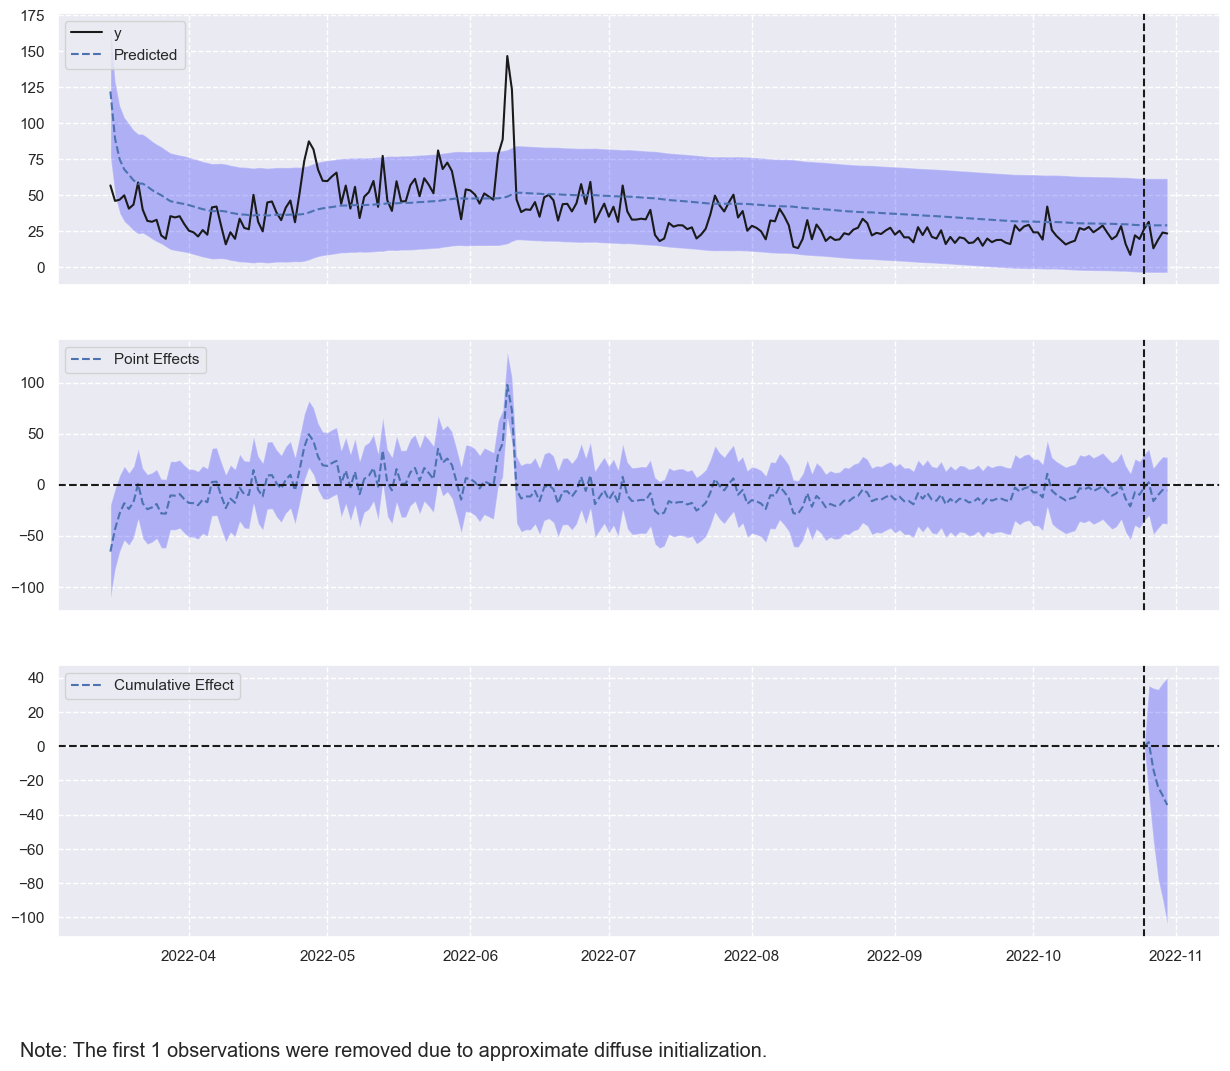

In [305]:
# Causal impact model
impact = CausalImpact(data=data, pre_period=pre_period, post_period=post_period)
# Visualization
impact.plot()

In [306]:
print(impact.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 22.12. In the absence of an
intervention, we would have expected an average response of 28.98.
The 95% interval of this counterfactual prediction is [14.09, 42.97].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -6.86 with a 95% interval of
[-20.85, 8.03]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 110.59.
Had the intervention not taken place, we would have expected
a sum of 144.91. The 95% interval of this prediction is [70.45, 214.85].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decrease of -23

In [307]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    22.12              110.59
Prediction (s.d.)         28.98 (7.37)       144.91 (36.84)
95% CI                    [14.09, 42.97]     [70.45, 214.85]

Absolute effect (s.d.)    -6.86 (7.37)       -34.32 (36.84)
95% CI                    [-20.85, 8.03]     [-104.26, 40.14]

Relative effect (s.d.)    -23.68% (25.42%)   -23.68% (25.42%)
95% CI                    [-71.95%, 27.7%]   [-71.95%, 27.7%]

Posterior tail-area probability p: 0.2
Posterior prob. of a causal effect: 80.22%

For more details run the command: print(impact.summary('report'))


In [309]:
impact.trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                    CPT   No. Observations:                  226
Model:                    local level   Log Likelihood                -303.641
Date:                Thu, 01 Dec 2022   AIC                            611.282
Time:                        13:22:40   BIC                            618.114
Sample:                    03-14-2022   HQIC                           614.039
                         - 10-25-2022                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.7515      0.039     19.167      0.000       0.675       0.828
sigma2.level         0.0001   9.28e-05      1.551      0.121   -3.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                 118.10   Jarque-Bera (JB):               822.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             2.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

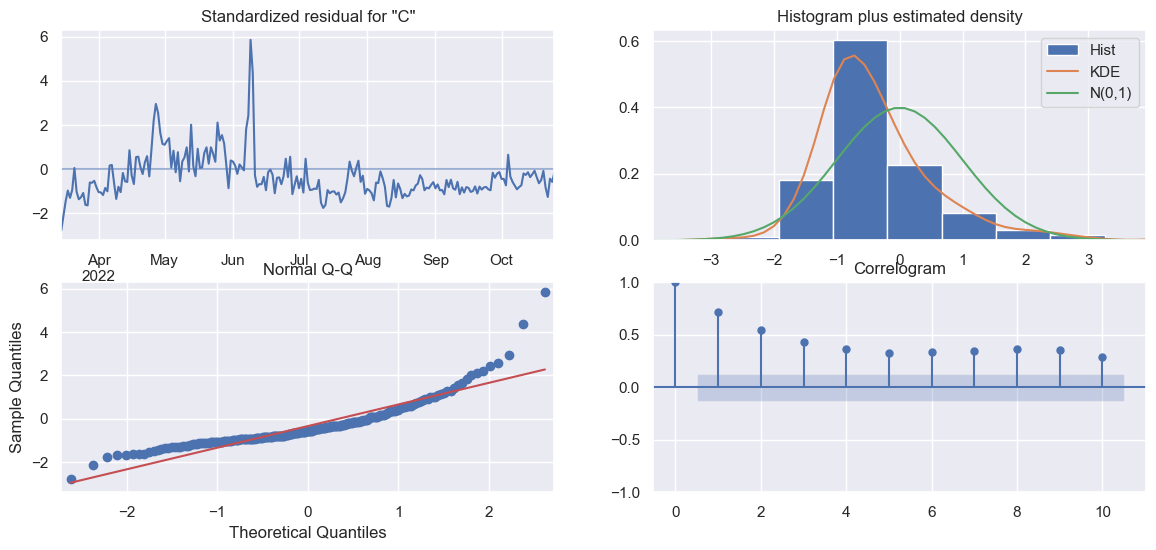

In [310]:
_ = impact.trained_model.plot_diagnostics(figsize=(14,6))